In [1]:
import numpy as np
import pandas as pd
import streamlit as st
import plotly.express as px

In [2]:
df = pd.read_csv("athlete_events.csv")
region = pd.read_csv("noc_regions.csv")

In [3]:
df.shape

(271116, 15)

In [4]:
df = df[df['Season'] == 'Summer']

In [5]:
df.shape

(222552, 15)

In [6]:
region

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [7]:
df = df.merge(region,on='NOC',how='left')

In [8]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [9]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(1385)

In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
pd.get_dummies(df['Medal'],dtype=int)

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [13]:
df = pd.concat([df,pd.get_dummies(df['Medal'],dtype=int)],axis=1)

In [14]:
df.groupby('NOC')[['Gold','Silver','Bronze']].sum().sort_values(by=['Gold','Silver','Bronze'],ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,VIN,0,0,0
226,VNM,0,0,0
227,YAR,0,0,0
228,YEM,0,0,0


In [15]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [16]:
tally = medal_tally.groupby('region')[['Gold','Silver','Bronze']].sum().sort_values(by=['Gold','Silver','Bronze'],ascending=False).reset_index()
tally

,region,Gold,Silver,Bronze
0,USA,1035,802,708
1,Russia,592,498,487
2,Germany,444,457,491
3,UK,278,317,300
4,France,234,256,287
...,...,...,...,...
200,Timor-Leste,0,0,0
201,Turkmenistan,0,0,0
202,Vanuatu,0,0,0
203,"Virgin Islands, British",0,0,0


In [17]:
tally['Total'] = tally['Gold'] + tally['Silver'] + tally['Bronze']

In [18]:
tally

,region,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Timor-Leste,0,0,0,0
201,Turkmenistan,0,0,0,0
202,Vanuatu,0,0,0,0
203,"Virgin Islands, British",0,0,0,0


In [19]:
years = df['Year'].unique().tolist()

In [20]:
years.sort()

In [21]:
years.insert(0,'Overall')

In [22]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [23]:
country = np.unique(df['region'].dropna().values).tolist()

In [24]:
country.sort()
country.insert(0,'Overall')

In [25]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [26]:
medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])


In [27]:
def fetch_medal_tally (df,year,country):
    medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

    flag = 0
    if year == 'Overall' and country == 'Overall' :
        temp_df = medal_df

    if year == 'Overall' and country != 'Overall' :
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]

    if year != 'Overall' and country == 'Overall' :
        temp_df = medal_df[medal_df['Year'] == int(year)]

    if year != "Overall" and country != 'Overall' :
        temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)] 

    if flag == 1 :
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else :    
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
        
    x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']

    print(x)

In [28]:
# fetch_medal_tally(year='Overall',country='Overall')

In [29]:
# fetch_medal_tally(year='Overall',country='India')


In [30]:
# fetch_medal_tally(year='1900',country='India')


#### Overall Analysis

1. No of editions
2. No of cities
3. No of events/sports
4. No. of athletes
5. participating nations


In [31]:
df['Year'].unique().shape[0] - 1

28

In [32]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [33]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [34]:
df['Event'].unique()


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Floor Exercise", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's Shot Put",
       'Art Competitions Mixed Sculpturing, Unknown Event',
       "Handball Women's Handball",
       "Weightlifting Women's Super-Heavyweight",
       "Wrestling Men's Light-Heavyweight, Greco-Roman",
       "Gymnastics M

In [35]:
df['Name'].unique()


array(['A Dijiang', 'A Lamusi', 'Gunnar Nielsen Aaby', ...,
       'James Francis "Jim" Zylker', 'Aleksandr Viktorovich Zyuzin',
       'Olga Igorevna Zyuzkova'], dtype=object)

In [36]:
nation_over_time = df.drop_duplicates(['Year','region'])["Year"].value_counts().reset_index().sort_values('Year')

In [37]:
nation_over_time

,Year,count
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
23,1912,29
24,1920,29
21,1924,45
20,1928,46
19,1932,47


In [38]:
fig = px.line(nation_over_time,x='Year',y='count')
fig.show()

In [39]:
Event_over_time = df.drop_duplicates(['Year','Event'])["Year"].value_counts().reset_index().sort_values('Year')
Event_over_time

,Year,count
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
x = df.drop_duplicates(["Year",'Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

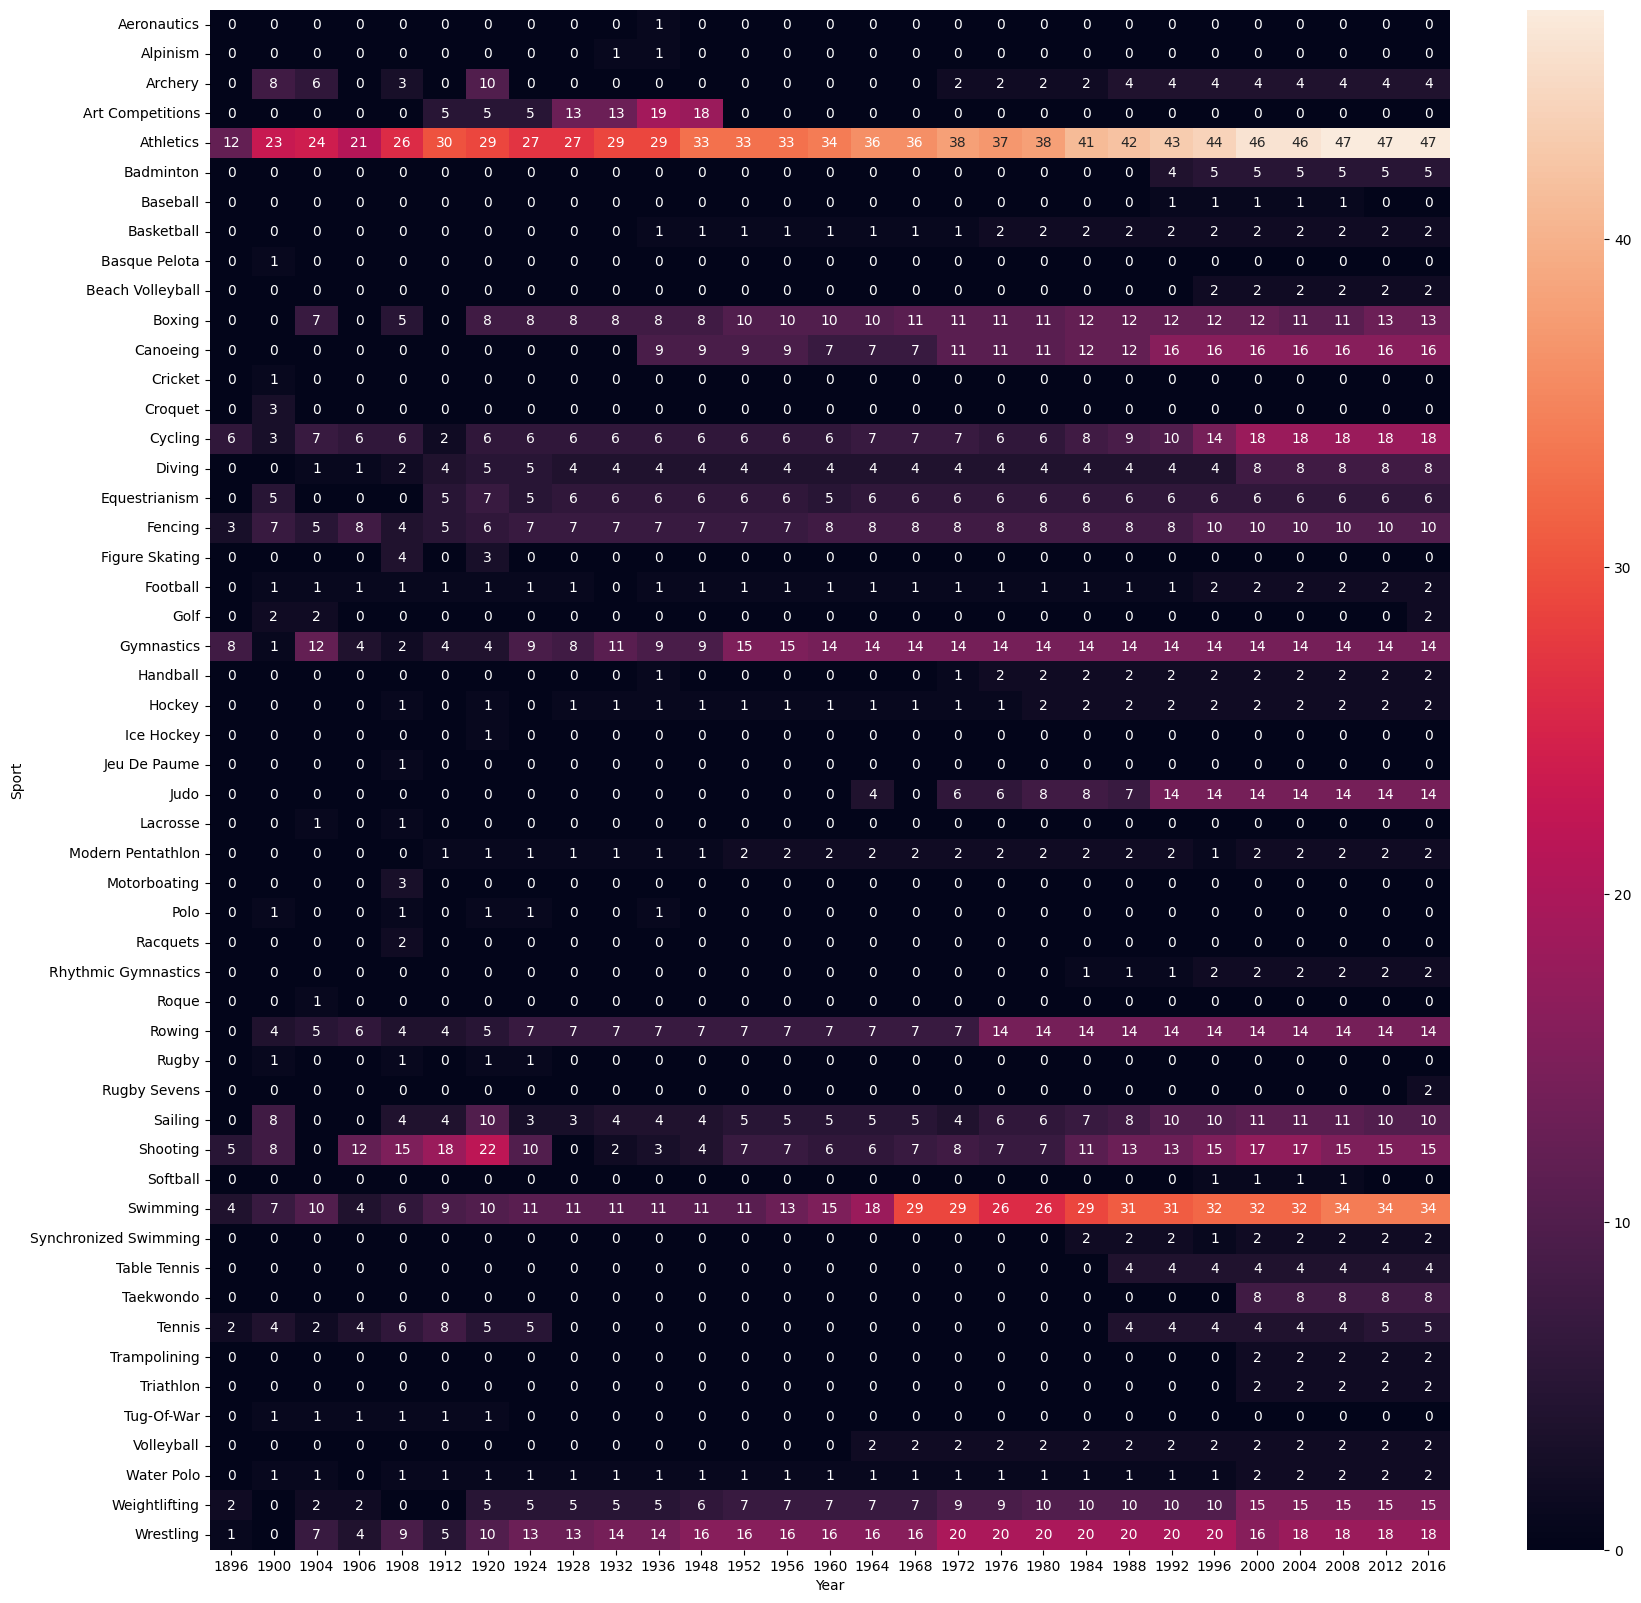

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [43]:
df.dropna(subset=['Medal'])['Name'].value_counts().reset_index().merge(df,left_on='Name',right_on='Name',how='left')[['Name','count','Sport','region']].drop_duplicates('Name')

,Name,count,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
...,...,...,...,...
63086,Ren Abadie,1,Cycling,France
63088,Giovanni Abagnale,1,Rowing,Italy
63089,Jos Luis Abajo Gmez,1,Fencing,Spain
63090,Patimat Abakarova,1,Taekwondo,Azerbaijan


In [44]:
def most_succesful (df,sport) :
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    return temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name',right_on='Name',how='left')[['Name','count','Sport','region']].drop_duplicates("Name").rename(columns = {'count':'Medals'})

In [45]:
most_succesful(df,'Overall')

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Birgit Fischer-Schmidt,12,Canoeing,Germany
170,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
187,Ryan Steven Lochte,12,Swimming,USA


In [46]:
most_succesful(df,'Gymnastics')

,Name,Medals,Sport,region
0,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
19,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
43,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
67,Takashi Ono,13,Gymnastics,Japan
100,Sawao Kato,12,Gymnastics,Japan
124,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
145,Viktor Ivanovych Chukarin,11,Gymnastics,Russia
161,Vra slavsk (-Odloilov),11,Gymnastics,Czech Republic
179,Vitaly Venediktovich Shcherbo,10,Gymnastics,Russia
195,Polina Hryhorivna Astakhova,10,Gymnastics,Russia


#### Country Wise 

1. countrywise medal tally over year
2. what countries are good at heatmap
3. Most successful athletes (Top 10)

In [47]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\sauda\AppData\Local\Temp\ipykernel_15184\3249058805.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\sauda\AppData\Local\Temp\ipykernel_15184\3437740481.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
new_df = temp_df[temp_df['region'] == 'USA']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [50]:
fig = px.line(final_df,x='Year',y = 'Medal')
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

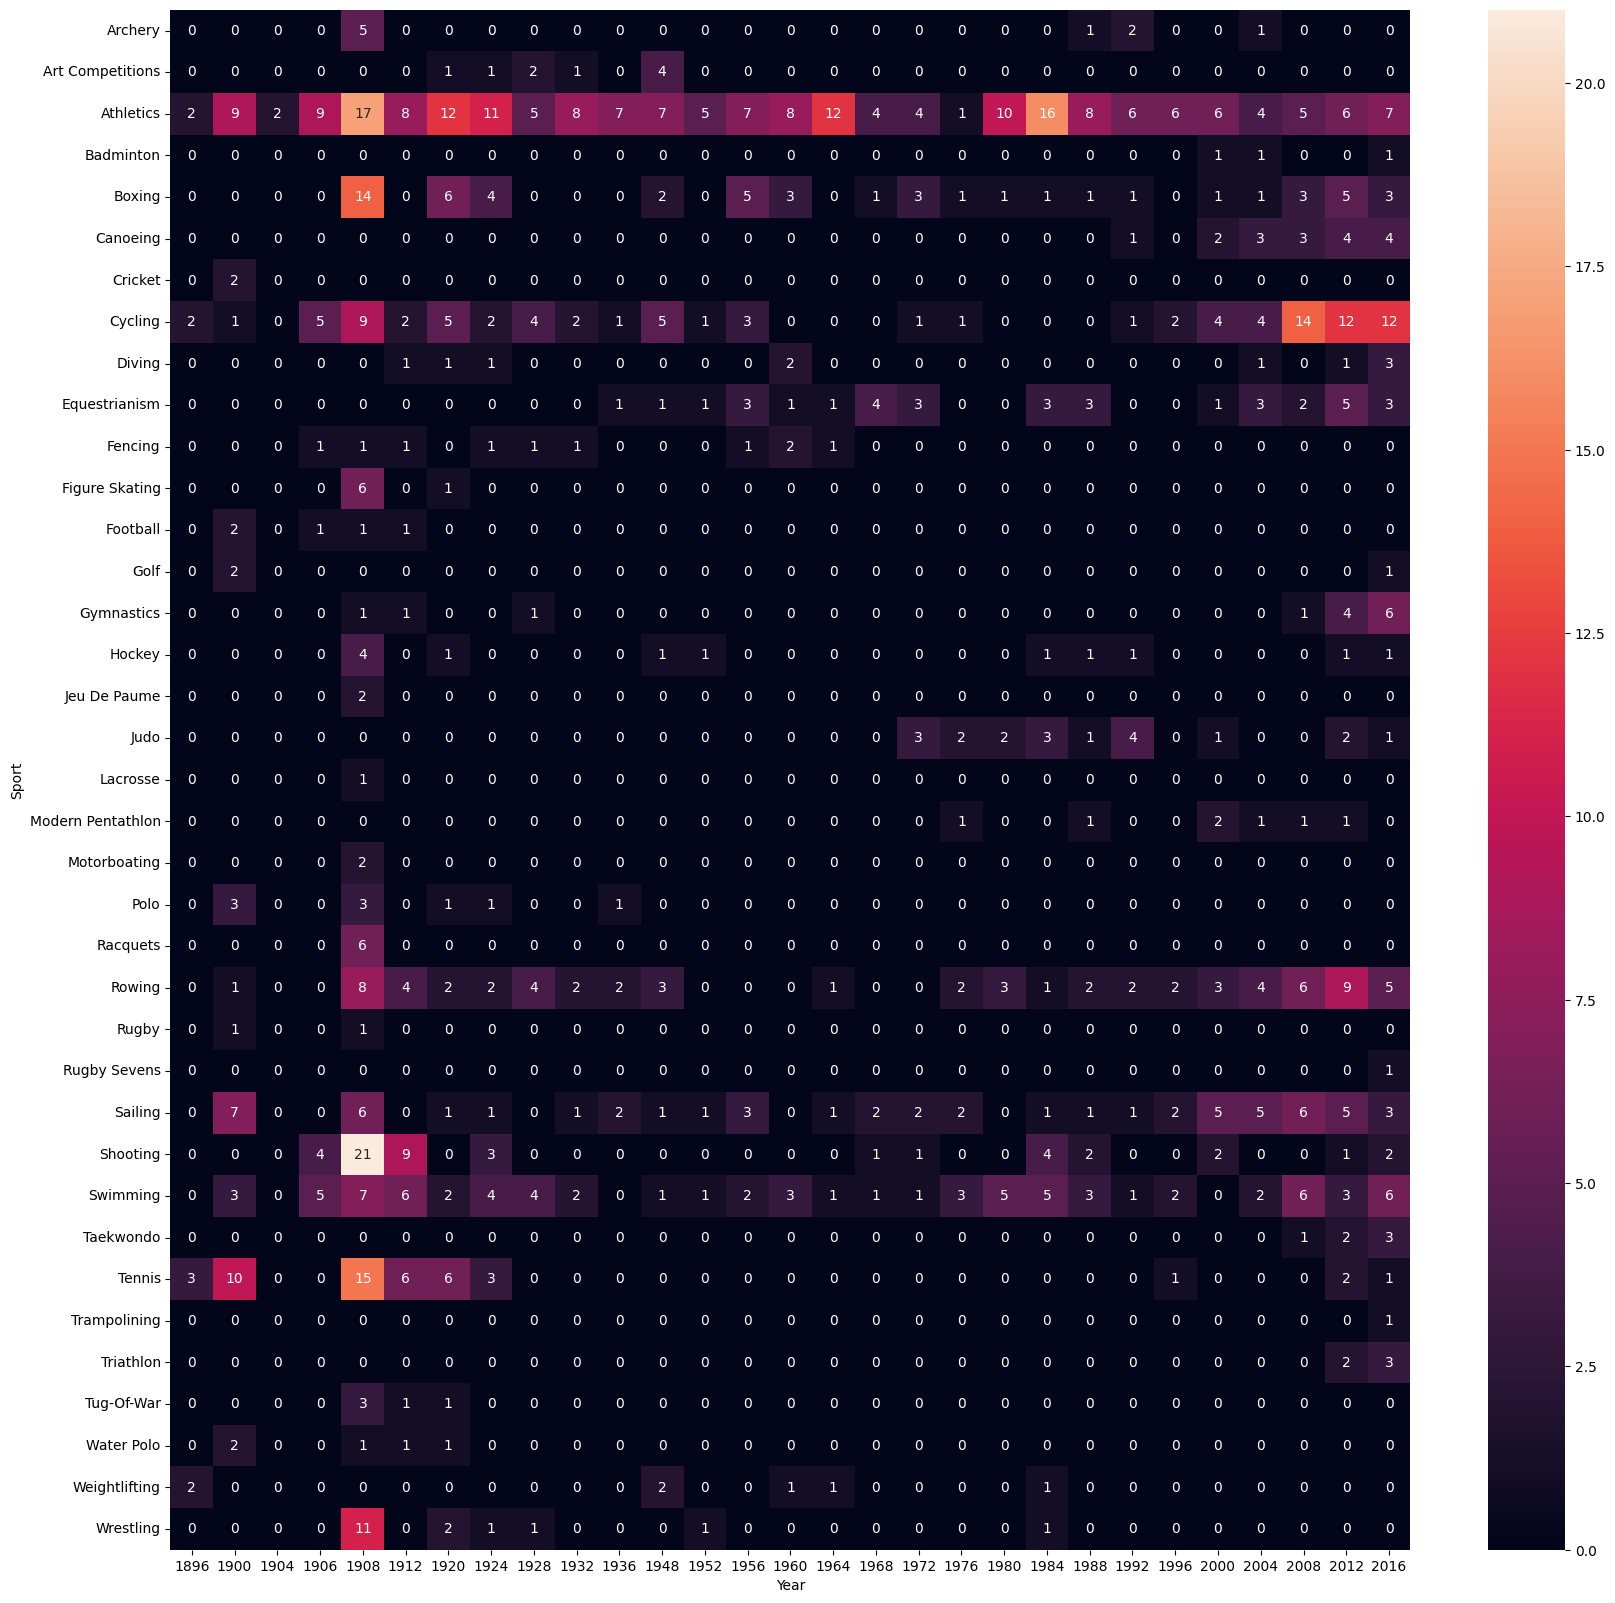

In [51]:
new_df = temp_df[temp_df['region'] == 'UK']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [52]:
def most_succesful (df,country) :
    temp_df = df.dropna(subset=['Medal'])

    temp_df = temp_df[temp_df['region'] == country]

    return temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name',right_on='Name',how='left')[['Name','count','Sport']].drop_duplicates("Name").rename(columns = {'count':'Medals'})
    

In [53]:
most_succesful(df,'USA')

,Name,Medals,Sport
0,"Michael Fred Phelps, II",28,Swimming
30,Ryan Steven Lochte,12,Swimming
44,Natalie Anne Coughlin (-Hall),12,Swimming
56,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming
69,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming
86,Mark Andrew Spitz,11,Swimming
98,"Matthew Nicholas ""Matt"" Biondi",11,Swimming
110,Carl Townsend Osburn,11,Shooting
126,"Gary Wayne Hall, Jr.",10,Swimming
136,"Frederick Carlton ""Carl"" Lewis",10,Athletics


#### Athletes Wise

In [54]:
import plotly.figure_factory as ff

In [55]:
athlete_df = df.drop_duplicates(subset=['Name','region'])

In [56]:
x1 = athlete_df["Age"].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']["Age"].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']["Age"].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']["Age"].dropna()

In [57]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

In [256]:
sport_list = ['Basketball', 'Judo', 'Football', 'Athletics',
   'Swimming', 'Badminton', 'Sailing', 'Gymnastics', 'Handball', 'Weightlifting', 
   'Wrestling','Water Polo', 'Hockey', 'Rowing', 'Fencing',
   'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
   'Tennis',  'Golf', 'Softball', 'Archery',
   'Volleyball','Synchronized Swimming', 'Table Tennis', 'Baseball',
   'Rhythmic Gymnastics', 'Trampolining',
   'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo',
   'Ice Hockey','Rugby Sevens',
   'Art Competitions','Tug-Of-War']

In [ ]:
x = []
name = []
for sport in sport_list:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna().values.astype(int))
    name.append(sport)


In [265]:
# x

In [ ]:
fig = ff.create_distplot(x,name,show_hist=False,show_rug=False)
# pd.DataFrame(x,index=name)

In [264]:
fig.show()

In [218]:
athlete_df[(athlete_df['Sport'] == "Rugby") & (athlete_df['Medal'] == 'Gold')]['Age'].dropna()

2395      20.0
12572     28.0
18502     21.0
29785     24.0
30143     21.0
30144     33.0
35401     25.0
35648     23.0
38477     26.0
44242     24.0
45746     26.0
47308     23.0
47714     21.0
55741     22.0
58326     25.0
58455     27.0
64308     24.0
66643     25.0
69358     26.0
70293     24.0
79308     21.0
83589     20.0
84125     23.0
98929     24.0
108580    36.0
111204    21.0
121839    26.0
126367    25.0
126392    20.0
126668    24.0
127320    28.0
127506    29.0
127970    23.0
130207    24.0
136115    24.0
145352    25.0
145852    21.0
150784    21.0
154647    23.0
164668    25.0
165123    23.0
165408    18.0
167134    22.0
167972    21.0
169816    23.0
175803    23.0
182979    23.0
182990    30.0
183472    22.0
194901    22.0
197050    25.0
201235    25.0
203233    23.0
214218    30.0
216137    20.0
Name: Age, dtype: float64

In [134]:
temp_df = athlete_df[(athlete_df['Sport'] == "Basketball")]
hist_data = temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna().values.astype(int).tolist()

In [135]:
hist_data = np.random.randn(1000)

In [158]:
def athlete_prime(df,sports):
    athlete_df = df.drop_duplicates(subset=['Name','region'])   
    temp_df = athlete_df[(athlete_df['Sport'] == sports)]
    hist_data = temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna().values.astype(int).tolist()
    return hist_data


In [178]:
selected_sport = 'Water Polo'
hist = athlete_prime(df,selected_sport)
hist

[22,
 24,
 27,
 34,
 23,
 21,
 31,
 22,
 30,
 32,
 27,
 29,
 29,
 23,
 29,
 25,
 21,
 24,
 24,
 20,
 27,
 25,
 23,
 25,
 23,
 24,
 24,
 18,
 31,
 24,
 32,
 22,
 26,
 26,
 32,
 22,
 30,
 31,
 25,
 25,
 24,
 33,
 21,
 26,
 22,
 25,
 26,
 28,
 20,
 29,
 24,
 22,
 17,
 19,
 23,
 21,
 25,
 22,
 27,
 28,
 19,
 24,
 22,
 31,
 20,
 20,
 24,
 19,
 27,
 22,
 30,
 27,
 27,
 23,
 25,
 40,
 25,
 22,
 24,
 24,
 22,
 22,
 24,
 22,
 19,
 28,
 21,
 35,
 24,
 23,
 17,
 20,
 25,
 22,
 25,
 27,
 25,
 19,
 24,
 22,
 24,
 22,
 24,
 38,
 33,
 26,
 20,
 22,
 21,
 25,
 22,
 26,
 24,
 30,
 18,
 23,
 26,
 31,
 21,
 19,
 24,
 18,
 28,
 26,
 23,
 25,
 26,
 30,
 27,
 33,
 23,
 22,
 28,
 23,
 22,
 24,
 24,
 25,
 24,
 25,
 24,
 28,
 26,
 21,
 27,
 23,
 21,
 23,
 23,
 24,
 25,
 21,
 23,
 22,
 21,
 21,
 26,
 20,
 21,
 23,
 29,
 23,
 24,
 21,
 23,
 27,
 19,
 24,
 24,
 22,
 25,
 22,
 22,
 24,
 22,
 22,
 28,
 22,
 24,
 25,
 19,
 24,
 21,
 29,
 24,
 20,
 23,
 26,
 34,
 28,
 29,
 31,
 25,
 21,
 26,
 25]

In [179]:

fig = ff.create_distplot([hist],[selected_sport],show_hist=False,show_rug=False)

In [174]:
fig.show()

In [168]:
sport_list = df['Sport'].unique().tolist()
sport_list.sort()
sport_list

['Aeronautics',
 'Alpinism',
 'Archery',
 'Art Competitions',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Basque Pelota',
 'Beach Volleyball',
 'Boxing',
 'Canoeing',
 'Cricket',
 'Croquet',
 'Cycling',
 'Diving',
 'Equestrianism',
 'Fencing',
 'Figure Skating',
 'Football',
 'Golf',
 'Gymnastics',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Jeu De Paume',
 'Judo',
 'Lacrosse',
 'Modern Pentathlon',
 'Motorboating',
 'Polo',
 'Racquets',
 'Rhythmic Gymnastics',
 'Roque',
 'Rowing',
 'Rugby',
 'Rugby Sevens',
 'Sailing',
 'Shooting',
 'Softball',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampolining',
 'Triathlon',
 'Tug-Of-War',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling']

In [274]:

athlete_df['Medal'].fillna('No Medal',inplace=True)
temp_df = athlete_df[(athlete_df['Sport'] == "Weightlifting")]


<Axes: xlabel='Weight', ylabel='Height'>

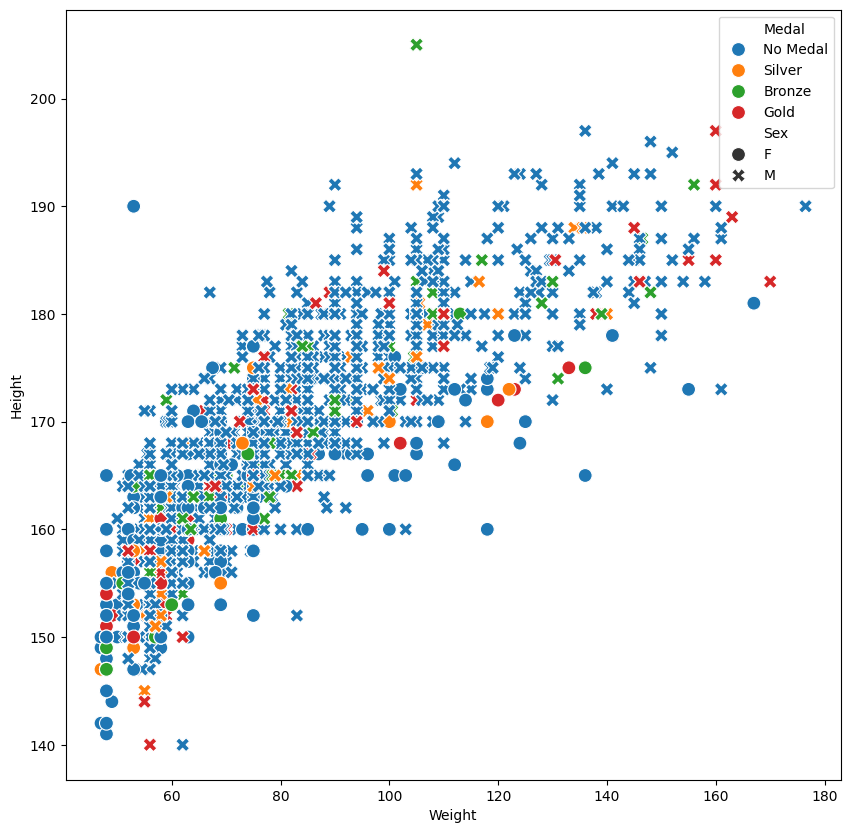

In [279]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=temp_df['Height'],x=temp_df['Weight'],hue=temp_df['Medal'],style=temp_df['Sex'],s=100)

In [288]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()
final = men.merge(women,on='Year',how='left')
final.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)
final.fillna(0,inplace=True)

In [290]:
final.astype(int)

,Year,Male,Female
0,1896,174,0
1,1900,1181,23
2,1904,629,6
3,1906,759,6
4,1908,1772,44
5,1912,1978,53
6,1920,2280,73
7,1924,2535,132
8,1928,2342,285
9,1932,1382,162


In [291]:
pd.read_csv("https://drive.google.com/file/d/1oZE-TE0Q5ha7ICzMXw5WXMsur9UYgkTw/view?usp=drive_link")

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 3604
